# Car Price Prediction

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Business goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Variable information

**symboling:** 	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical) 

**carname:**	Name of car make and model. (Categorical)

**fueltype:**	Car fuel type i.e. gas or diesel. (Categorical)

**aspiration:**	Aspiration used in a car. Mode of air intake for the internal combustion engine i.e. natural (standard) or turbocharger. (Categorical)

**doornumber:**	Number of doors in a car i.e. two or four. (Categorical)

**carbody:**	Body of car i.e. convertible or hardtop or hatchback or sedan or wagon. (Categorical)

**drivewheel:**	Type of drive wheel. The wheel connected to the motor/engine transmission, which causes the vehicle to move i.e. Front-wheel drive or Rear-wheel drive or Four-wheel drive. (Categorical)

**enginelocation:**	Location of car engine i.e. front or rear. (Categorical)

**wheelbase:**	Length of wheelbase of car. Wheelbase is the distance between centers of front and rear wheels. (Numeric)

**carlength:**	Length of car. (Numeric)

**carwidth:**	Width of car. (Numeric)

**carheight:**	Height of car. (Numeric)

**curbweight:**	The weight of a car without occupants or baggage. (Numeric)

**enginetype:**	Type of engine i.e. I, ohc, ohcf, ohcv, dohc, dohcv, rotor. (Categorical)

**cylindernumber:**	Number of cylidners used inside the engine i.e. two - twelve. (Categorical)

**enginesize:**	Engine size, or the engine displacement in the car. Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre to bottom dead centre. (Numeric)

**fuelsystem:**	Fuel system used in the car i.e. 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. Fuel-system provided fuel-air mixture to the engine. (Categorical)

**boreratio:**	Bore ratio of car. It is the ratio between cylinder bore diameter and piston stroke. (Numeric)

**stroke:**     Stroke or volume inside the engine. It is the distance travelled by the piston in each cycle. (Numeric)

**compressionratio:**	Compression ratio of car. It is the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine. (Numeric)

**horsepower:**	Horsepower of the engine. The power an engine produces is called horsepower. In mathematical terms, one horsepower is the power needed to move 550 pounds one foot in one second. (Numeric)

**peakrpm:**	RPM at which engine delivers peak horsepower. (Numeric)

**citympg:**	Mileage in city. (Numeric)

**highwaympg:**	Mileage on highway. (Numeric)

**price:**      Price of car. (Numeric) (Dependent variable)

In [148]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# filterning warnings
import warnings
warnings.filterwarnings("ignore")

## Reading and understanding data

In [2]:
# reading data from csv and creating dataframe
df = pd.read_csv("C:/Users/shara/Desktop/Projects/CarPrice/CarPrice_Assignment.csv")

In [3]:
# displaying first 5 rows
df.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# dropping the ID column as it will not be useful in predicting our dependent variable
df.drop(columns="car_ID", inplace=True)

In [5]:
# dimensions of dataframe
print("No. of rows: {}\tNo. of columns: {}".format(*df.shape))

No. of rows: 205	No. of columns: 25


In [6]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [7]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


## Feature engineering

In [32]:
# % of missing values
(df.isna().sum() / df.shape[0]) * 100

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
make                0.0
price_category      0.0
dtype: float64

**Missing values:**
* There are no missing values observed.

### 1. Symboling

In [9]:
# converting from numeric to categorical variable type
df["symboling"] = df["symboling"].astype(str)

### 2. CarName

In [10]:
# extracting make from the values
df["make"] = df['carname'].str.split(' ', expand=True)[0]

In [11]:
# unique values in make
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Correcting typo errors in make values:**

maxda = mazda

Nissan = nissan

porcshce = porsche

toyouta = toyota

vokswagen = vw = volkswagen

In [12]:
# correcting the typo errors in make values
df["make"] = df["make"].replace({"maxda":"mazda",
                               "Nissan":"nissan",
                               "porcshce":"porsche",
                               "toyouta":"toyota",
                               "vokswagen":"volkswagen",
                               "vw":"volkswagen"})

In [13]:
# dropping the car name variable
df.drop(columns="carname", inplace=True)

### 3. Creating price category

In [14]:
# categorizing price into standard and high-end
df["price_category"] = df["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")

In [15]:
# creating list of numeric and categorical columns
col_numeric = list(df.select_dtypes(exclude="object"))

col_categorical = list(df.select_dtypes(include="object"))

## Exploratory Data Analysis

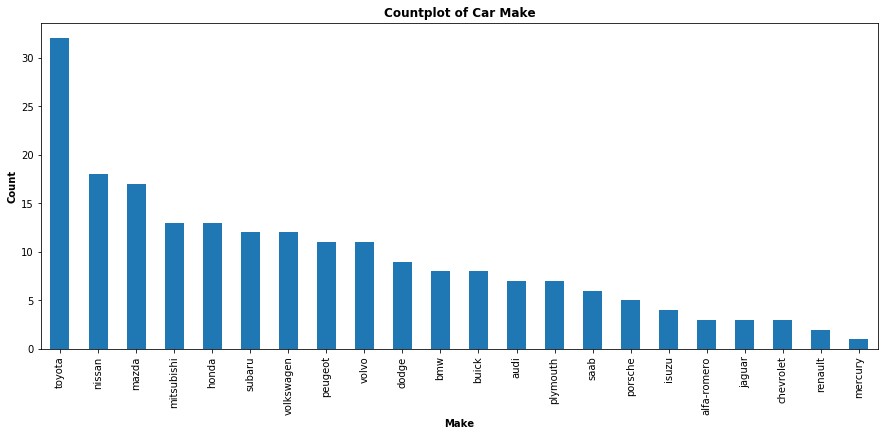

In [16]:
# visualizing the car make
plt.figure(figsize=(15,6))
df["make"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car Make", fontweight="bold")
plt.show()

**Insights:**

* Toyota seems to be the most favourite make.
* Mercury seems to be the least favourite make.

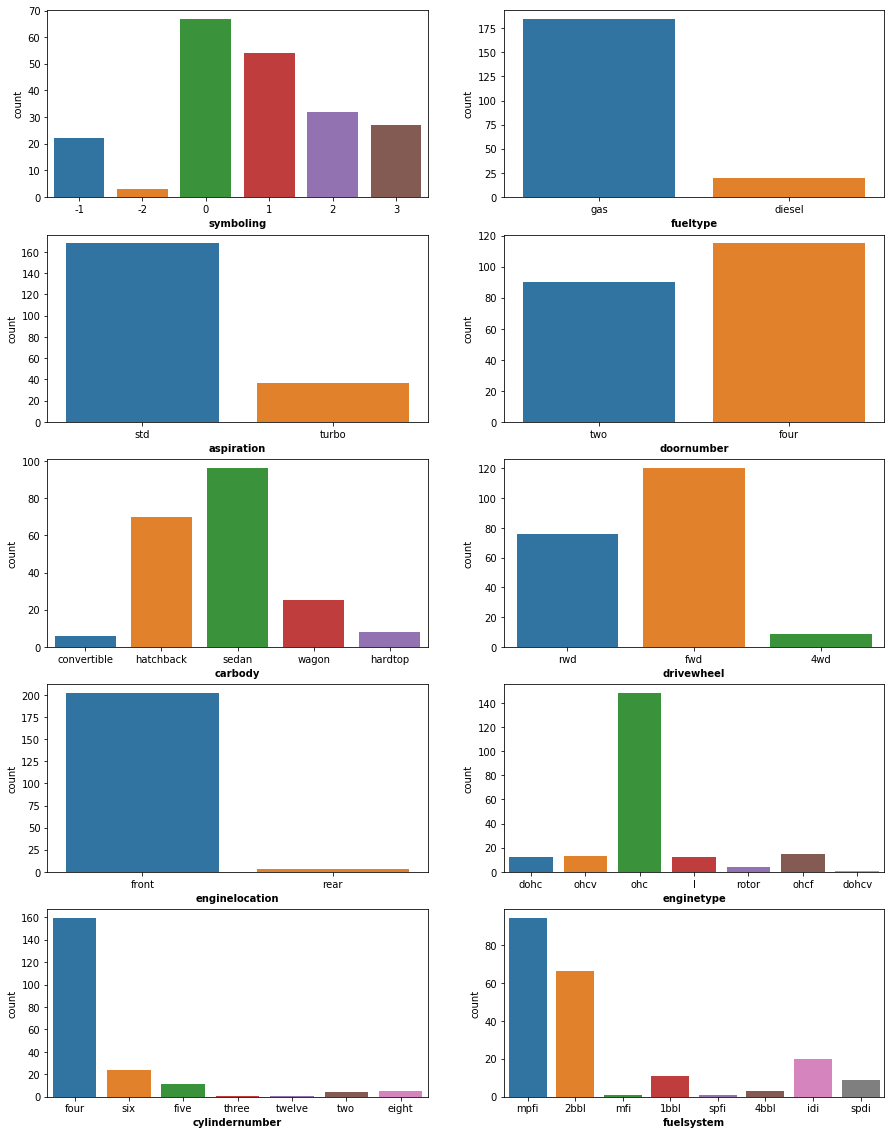

In [17]:
# visualizing the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    plt.xlabel(col, fontweight="bold")
plt.show()

**Insights:**

* `symboling`: A majority of auto makers are neither safe nor risky. Looks like there are more number of risky autos as compared to safe ones.
* `fueltype`: Majority of the automobiles are gas fuel type.
* `aspiration`: Majority of the automobiles use standard aspiration.
* `doornumber`: Majority of the automobiles are 4 door models.
* `carbody`: Sedan is the most common model, convertible is the least common model.
* `drivewheel`: Forward wheel drive is the most common model, 4 wheel drive is the least common model.
* `enginelocation`: Almost all the models are having engine location as front.
* `enginetype`: Majority (almost all) of the models are having 'ohc' engine type.
* `cylindernumber`: Majority (almost all) of the models are 4 cylinder models.
* `fuelsystem`: Majority of the models are having 'mpfi' and '2bbl' fuel systems.

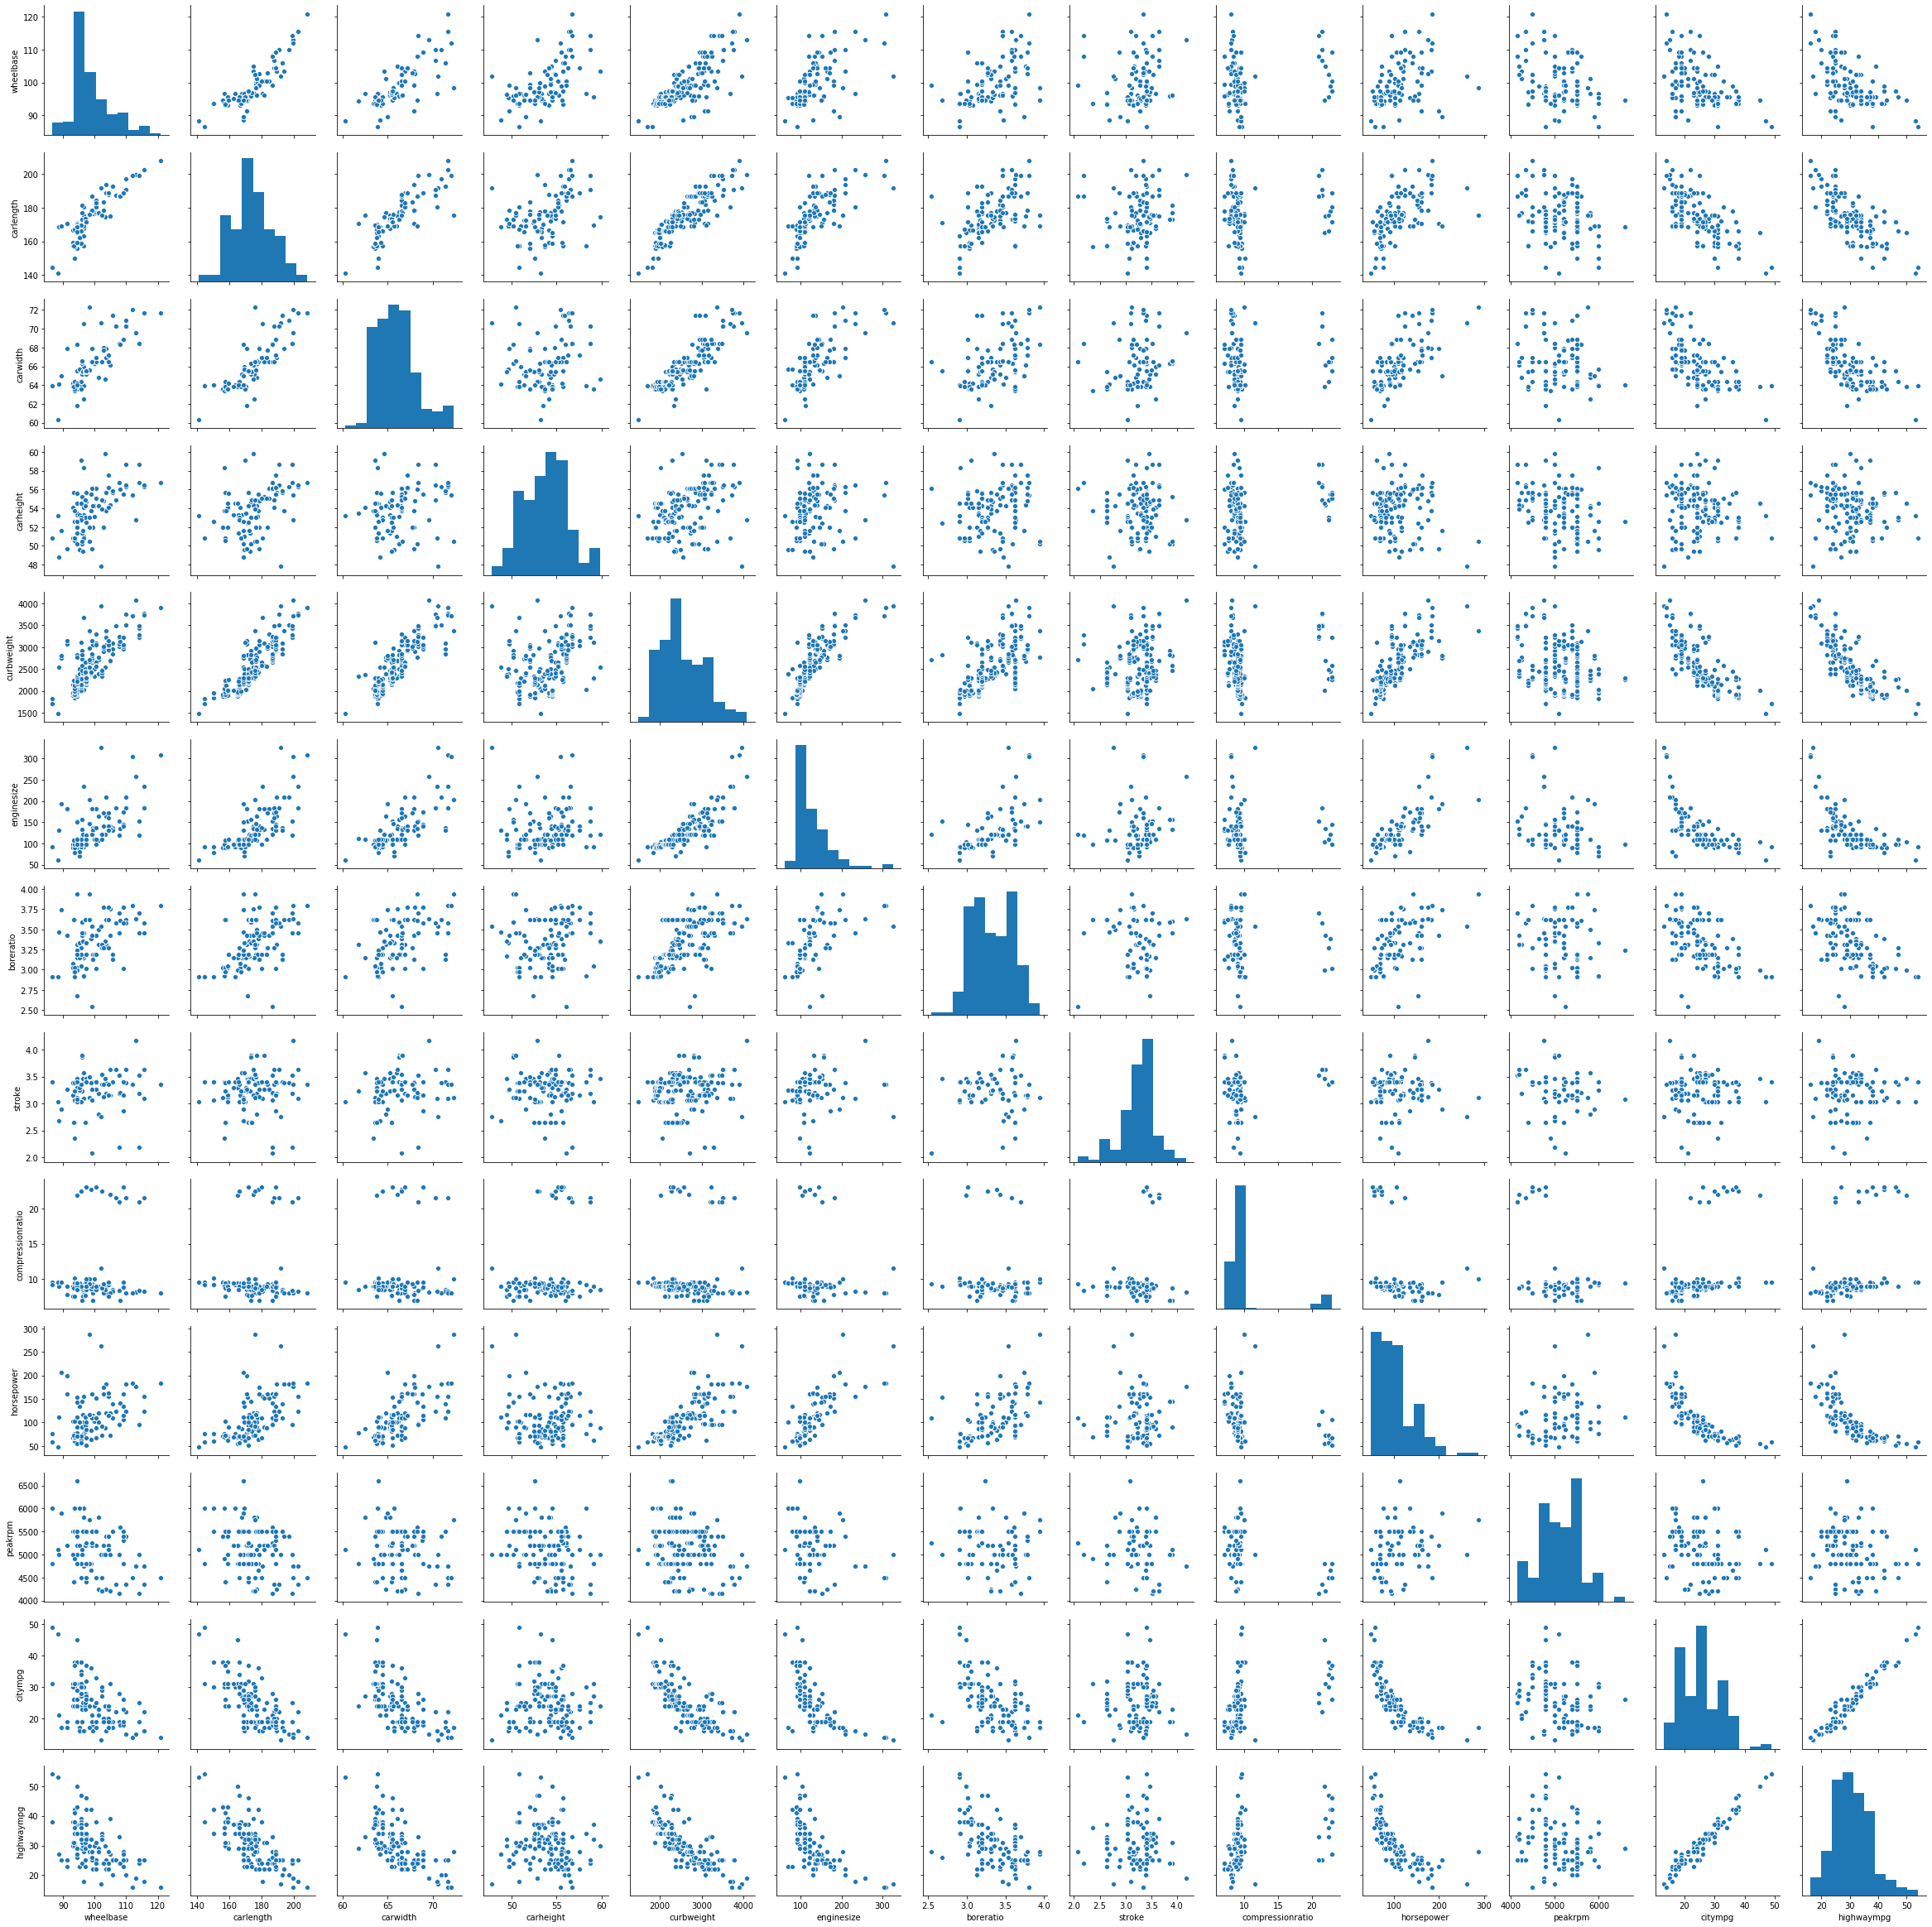

In [18]:
# pair plot to understand the correlation between the numeric variables (except price)
sns.pairplot(df[col_numeric[:-1]])
plt.show()

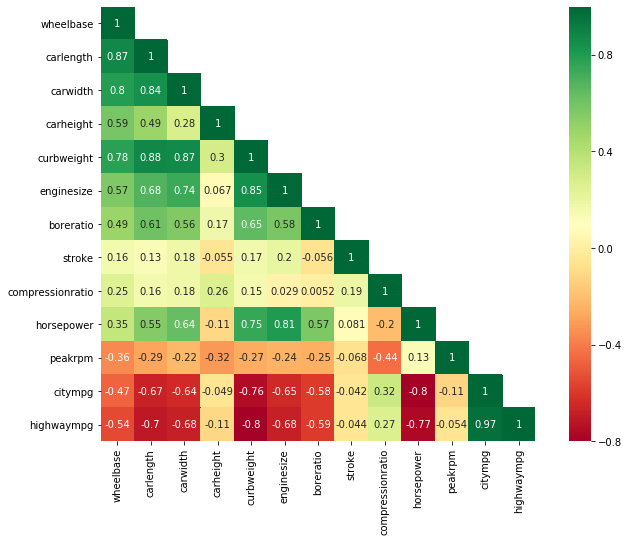

In [19]:
# heatmap to visualize the pearson's correlation matrix between the numeric variables (except price)
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="price").corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.drop(columns="price").corr(), k=1))
plt.show()

**Insights:**

* Model specifications (`wheelbase`, `carlenght`, `carweight`, `carheight`, `crubweight`, `enginesize`, `boreratio`, `stroke`, `compressionratio`, `horsepower`) and performance metrics (`peakrpm`, `citympg`, `highwaympg`) are mostly negatively correlated.

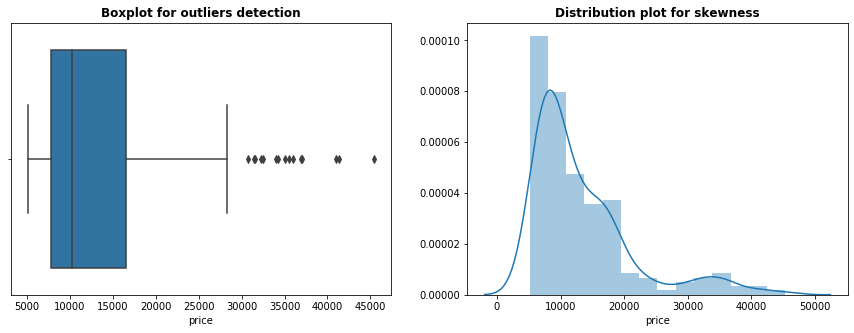

In [20]:
# visualizing our dependent variable for outliers and skewnwss
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df["price"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(df["price"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

**Insights:**

* There are few outliers towards the higher price range, suggesting that there are few high price models.
* The distribution of price is right skewed, maybe we should think about applying transformation methods.
* Most of the models are within 5000 and 18000 price range.

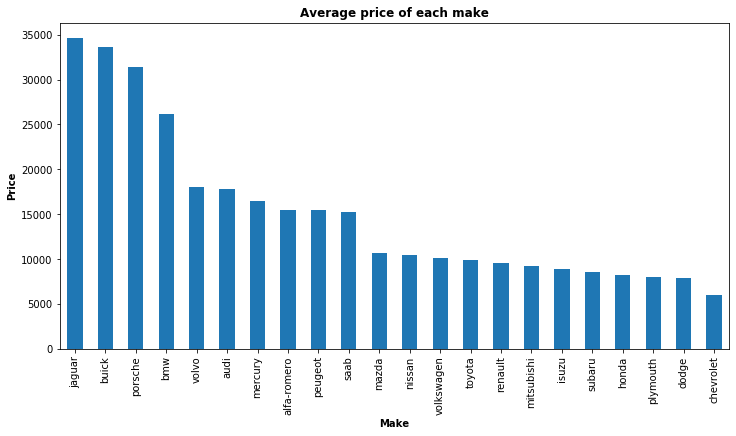

In [21]:
# average price of each make
df.groupby("make")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

**Insights:**

* `jaguar` make is having highest average price.
* `chevrolet` make is having least average price.

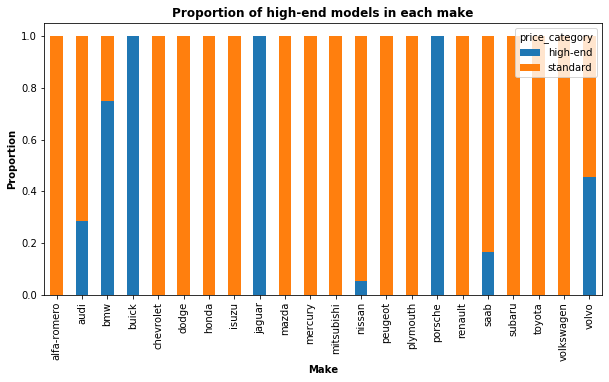

In [22]:
# proportion of high-end models in each make
pd.crosstab(df["make"], df["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each make", fontweight="bold")
plt.show()

**Insights:**

* `buick`, `jaguar` and `porsche` are having only high-end models.
* `bmw` is having 80% of their models as high-end.
* `volvo` is having equal proportion of high-end and standard price models.
* `audi`, `nissan` and `saab` are having less than 33% of models as high-end.
* The rest (majority) of the car makers are having only standard price models.

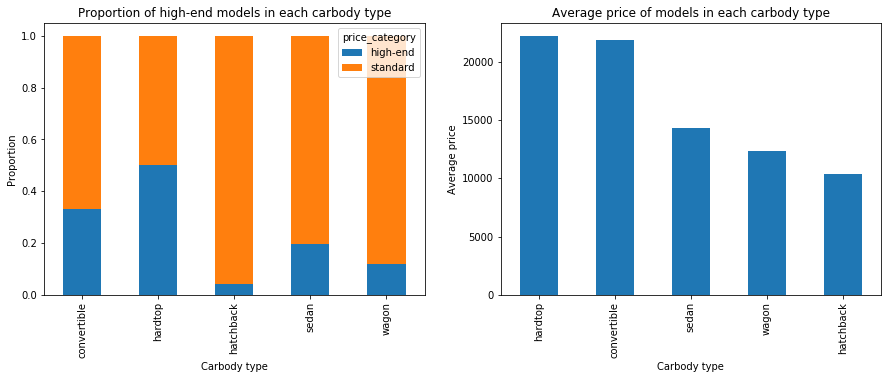

In [23]:
# price analysis for each carbody type
fig, ax = plt.subplots(1,2, figsize=(15,5))

pd.crosstab(df["carbody"], df["price_category"], normalize="index").plot.bar(stacked=True, ax=ax[0])
ax[0].set(xlabel="Carbody type", ylabel="Proportion", title="Proportion of high-end models in each carbody type")

df.groupby("carbody")["price"].mean().sort_values(ascending=False).plot.bar(ax=ax[1])
ax[1].set(xlabel="Carbody type", ylabel="Average price", title="Average price of models in each carbody type")

plt.show()

**Insights:**

* `hardtop` and `convertible` are having highest average price, and also high proportion of high-end price models.

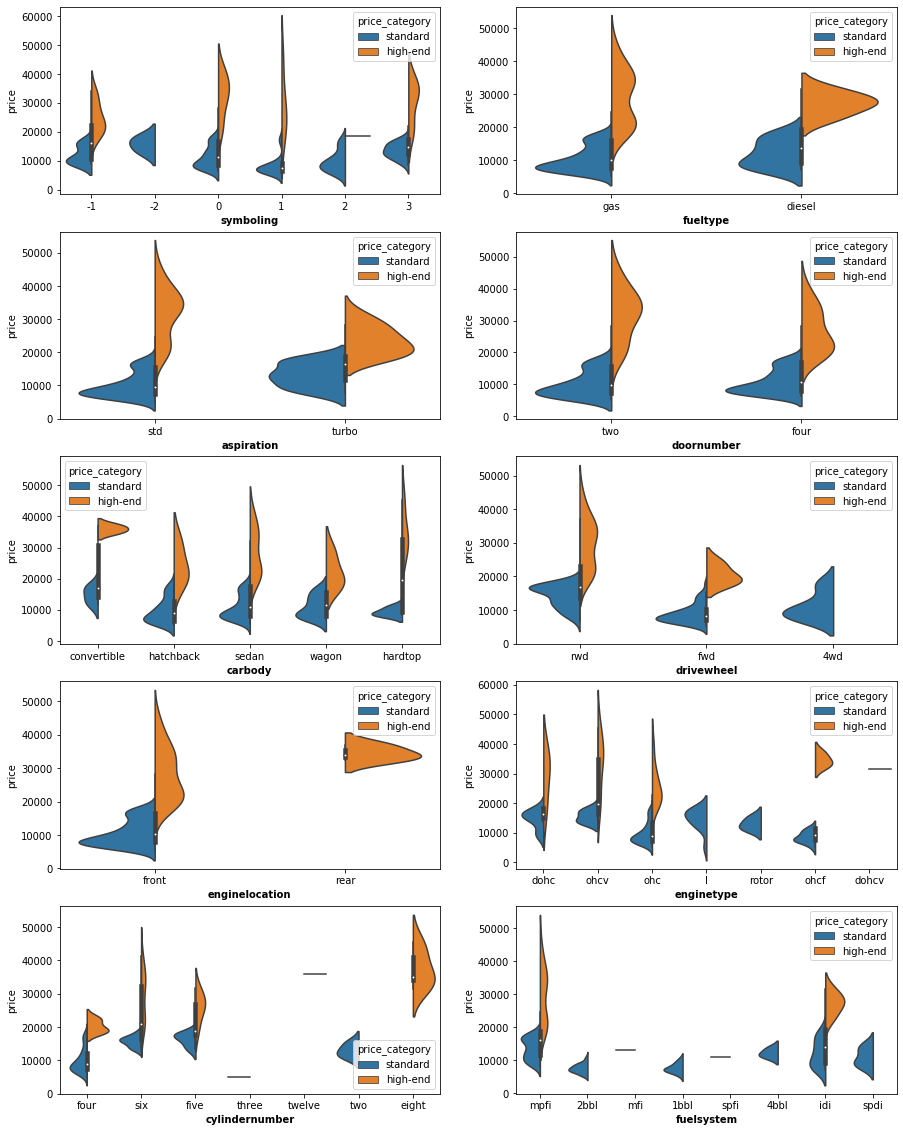

In [24]:
# visualizing distribution of price with the other categorical variables
plt.figure(figsize=(15,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,2,i)
    sns.violinplot(data=df, x=col, y="price", split=True, hue="price_category")
    plt.xlabel(col, fontweight="bold")
plt.show()

**Insights:**

* `price` and `symboling`, `fueltype`, `doornumber`, `carbody` doesn't seem to have much correlation.
* Safest (symboling -2) seems to have only standard priced models.
* `price` and `drivewheel` seems to have little correlation. All 4 wheel drive models are standard priced models.
* `price` and `enginelocation` seems to have correlation. All the rear engine models are high-end models.
* `price` and `enginetype` seems to have little correlation. While standard priced models are having all types of engines, high-end models are having 'dohc', 'ohc', 'ohcv' and 'ohcf' engine types.
* `price` and `cylindernumber` seems to have correlation. As the number of cylinders increases price of the model increases.
* `price` and `fuelsystem` seems to have little correlation. High-end models are having only 'idi' and 'mpfi' fuel systems.

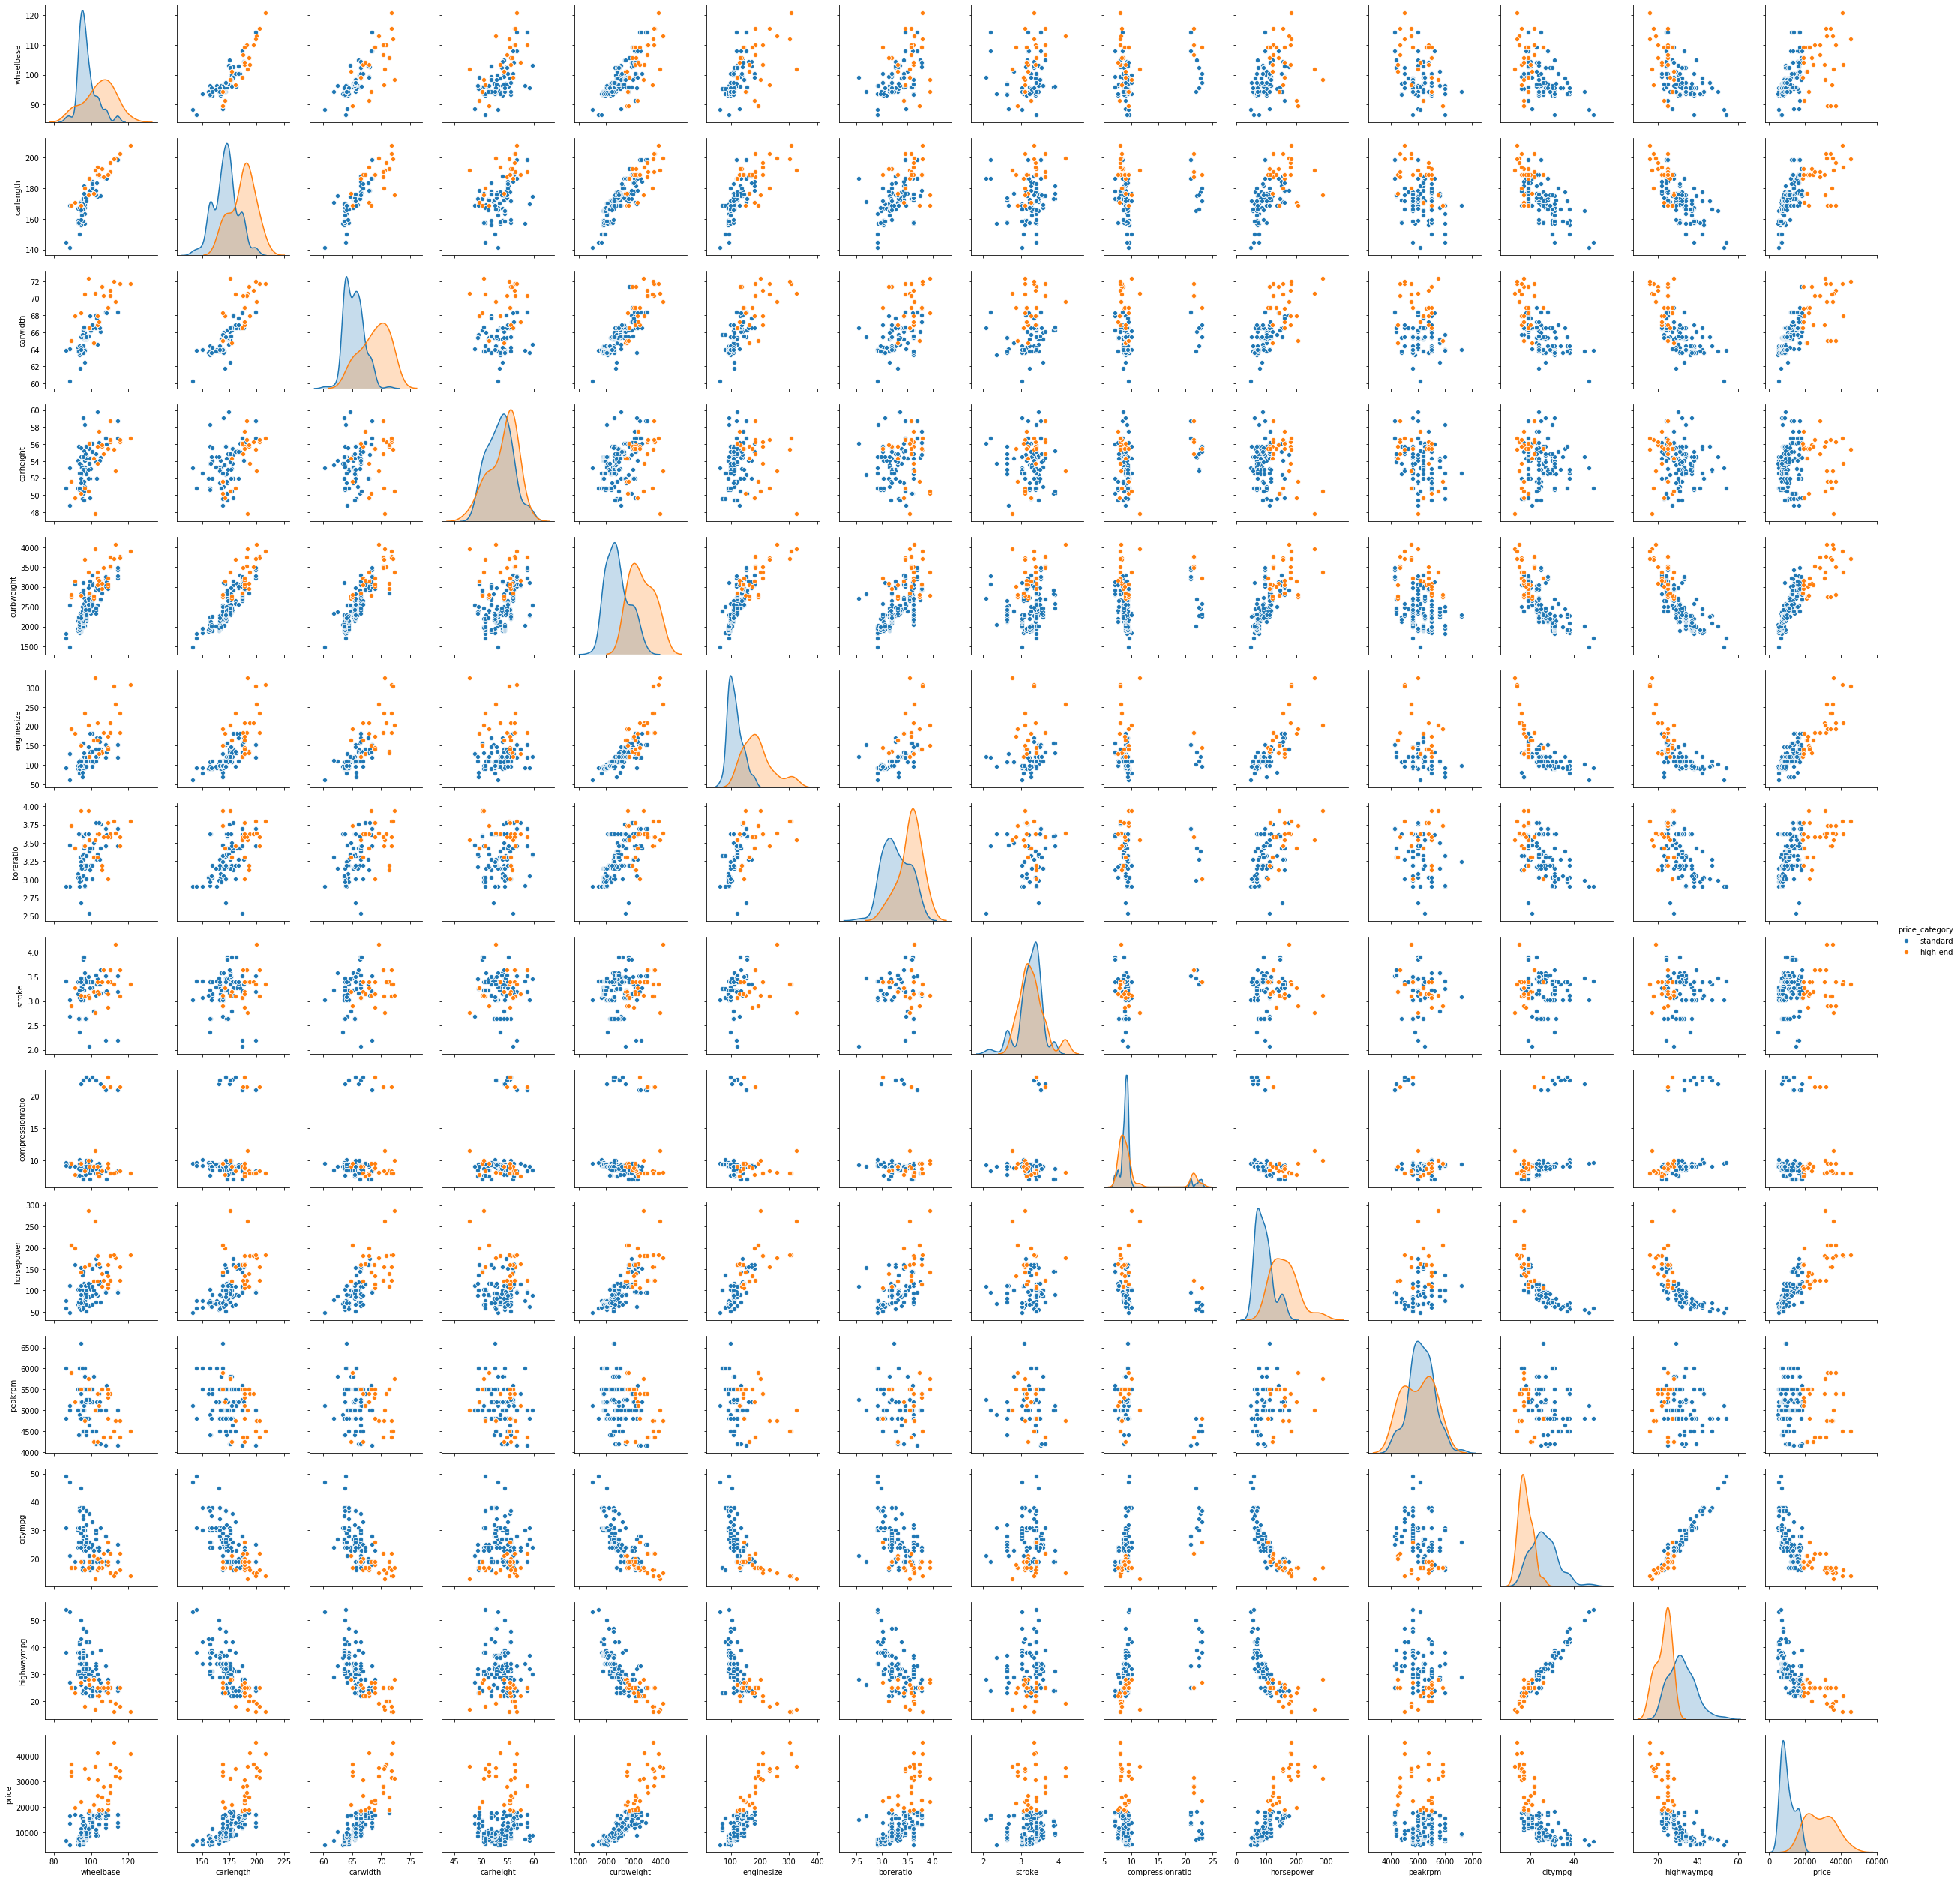

In [25]:
# visualizing distribution of price with continuous variables
col_numeric_pc = col_numeric.copy()
col_numeric_pc.append("price_category")
sns.pairplot(df[col_numeric_pc], hue="price_category")
plt.show()

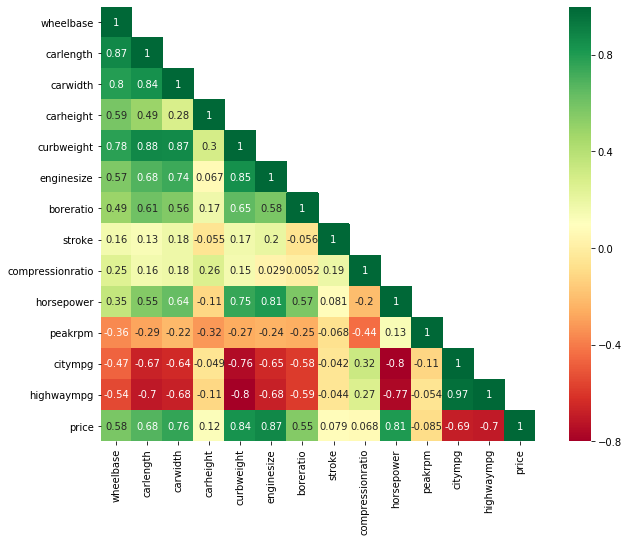

In [26]:
# heatmap to visualize the pearson's correlation between price and other the numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.corr(), k=1))
plt.show()

**Insights:**

* `price` is having high positive correlation with `curbweight`, `enginesize`, `horsepower`.
* `price` is having high negative correlation with `mpg`.

## Data preperation

### Converting categorical variables into numeric

Applying label encoding since I will be using a tree based model.

In [130]:
# converting categorical variables into numeric variables using label encoding
le = LabelEncoder()

df_encoded = df.drop(columns=["price_category"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,5,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,5,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


### Creating dependent and independent variables

In [137]:
# independent variables
X = df_encoded.drop(columns="price")

# dependent variable
y = df_encoded["price"]

### Splitting data into train test data

In [138]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling continuous numeric variables using standardization

In [128]:
# list of continuous numeric variables to apply scale
col_scale = col_numeric[:-1]

# scaling using standardization
ss = StandardScaler().fit(X_train[col_scale])
X_train[col_scale] =ss.transform(X_train[col_scale])
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,1.037085,0.072450,0.083817,0.276779,0.281287,0.188010,0.405836,1.215101,3.099860,-0.815386,-1.917829,0.964316,1.313501,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
111,1.541231,1.043916,1.170268,1.207269,1.016045,-0.158993,0.517384,-3.360166,-0.439591,-0.241894,-0.292907,-0.988126,-1.024569,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
153,-0.508962,-0.367616,-1.097108,2.178216,-0.541642,-0.852999,-1.007108,-0.709667,-0.283439,-1.064730,-0.699137,0.964316,1.001758,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
96,-0.710620,-0.732953,-1.002634,0.317235,-1.147082,-0.729070,-0.635281,0.110726,-0.179337,-0.890189,0.113323,0.964316,1.001758,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
38,-0.374523,-0.550285,-0.341316,-0.168238,-0.524008,-0.406852,-0.635281,1.025779,-0.283439,-0.466304,1.332015,0.313502,0.378273,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model building

### Decision tree regressor

**Building base model**

In [233]:
# building a base model
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [234]:
# scoring using test data
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9162114864099073


**Hyperparameter tuning**

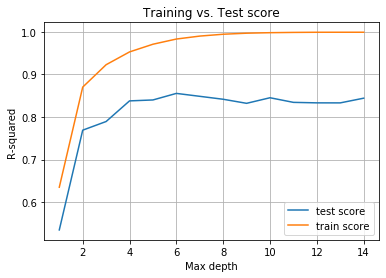

In [242]:
# hyperparameter tuning for best model
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)#[["mean_test_score","mean_train_score"]]

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

**Observations:**
- There is no improvement in training score after max depth 8, so we build our model with max depth 8.

In [263]:
# building final model
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9301280177342515


**Visualizing the tree**

In [238]:
# function to plot the decision tree
def DrawTree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

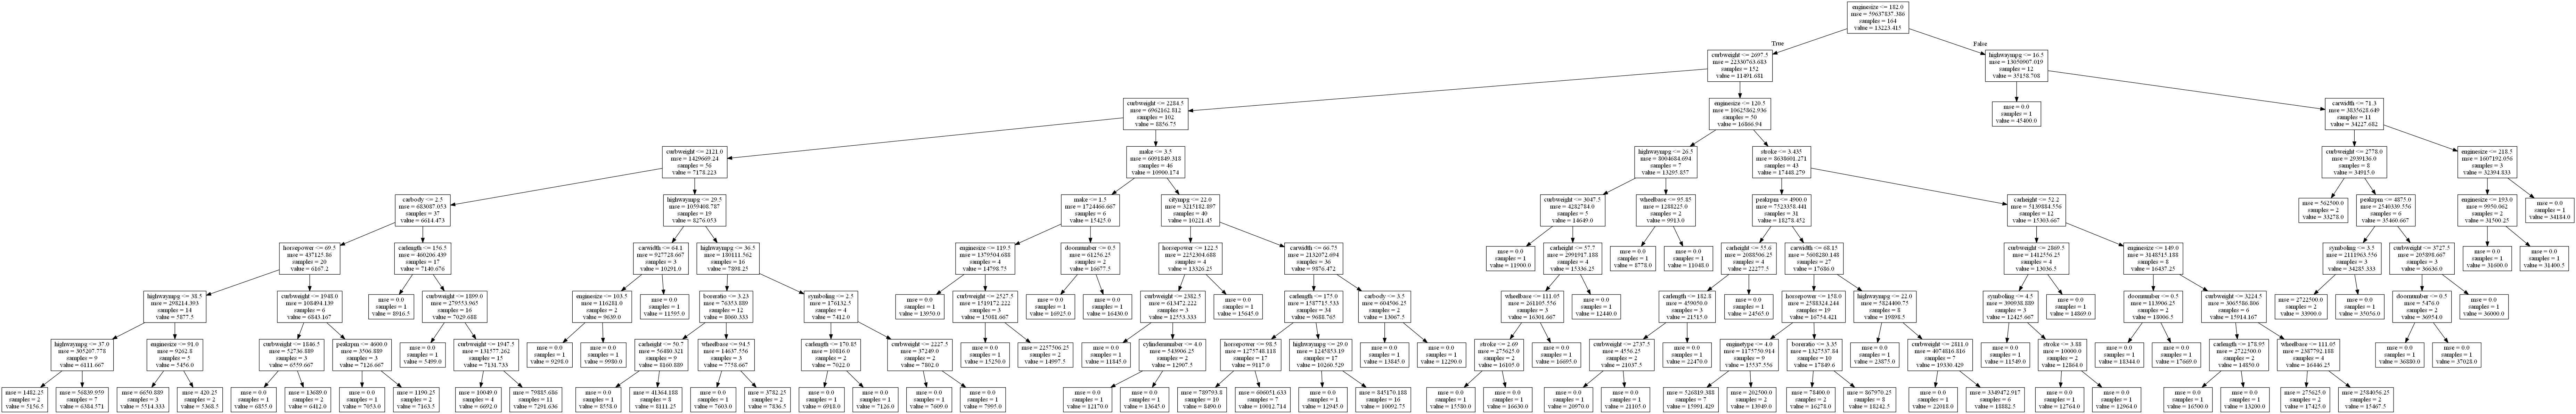

In [239]:
# plotting final decission tree
DrawTree(model,X_train.columns)